In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyreadstat
import seaborn as sns
from scipy import stats
import seaborn as sns
from scipy.stats import chi2_contingency

/home/marijatochadse/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/marijatochadse/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('/home/marijatochadse/1_data/EPOC/csv_files/EPOC_all_pat_119.csv', sep=",")

In [3]:
vars = ['Response', 'Geschlecht', 'Remission', 'Gruppe_Neu', 'F32F33',
              'Alter', 'YBOO00T0', 'YBOO01T0', 'OCTCDQ_Summe_Schadensvermeidung', 'OCTCDQ_Summe_Unvollstaendigkeitserleben', 'BeginnDSM_OCD_Master', 'OCI_R_Summe_Waschen', 
              'OCI_R_Summe_Kontrollieren', 'OCI_R_Summe_Ordnen', 'OCI_R_Summe_Zwangsgedanken', 'OCI_R_Summe_Horten', 'OCI_R_Summe_MentalesNeutralisieren',
              'MADRS_Summe_T0', 'BDI_II_Summe', 'STAI_TRAIT', 'WST_Summe', 'NEOFFI_Neurotizismus_Skala_Summenscore', 'NEOFFI_Extraversion_Skala_Summenscore', 'Summe_FB_ExekFunk_Emotionalitaet', 
              'Summe_FB_ExekFunk', 'SKID2_Skala_Selbstunsichere_Summe', 'SKID2_Skala_Zwanghafte_Summe', 'SKID2_Skala_Schizotypische_Summe', 'SKID2_Skala_Borderline_Summe', 
              'TCI_Summe_Skala_PessimismusOptimismus', 'TCI_Summe_Skala_AngstUngewisses', 'TCI_Summe_Skala_Schuechternheit', 'TCI_Summe_Skala_Ermuedbarkeit' ]

In [4]:
df_vars = df[vars]
df_vars.rename(columns={'Gruppe_Neu': 'Medikation'}, inplace=True)
df_vars.rename(columns={'F32F33': 'Komorbide Depression'}, inplace=True)

df_vars['Geschlecht'] = df_vars['Geschlecht'].replace({'Weiblich': 1, 'Männlich': 0})
df_vars['Response'] = df_vars['Response'].replace({0: 'Non-Response', 1: 'Response'})
df_vars['Remission'] = df_vars['Remission'].replace({0: 'Non-Remission', 1: 'Remission'})
df_vars['Medikation'] = df_vars['Medikation'].replace({'OCD_Med': 1, 'OCD_NoMed': 0})
df_vars['Komorbide Depression'] = df_vars['Komorbide Depression'].replace({'F32 und/oder F33 Diagnose': 1, 'keine F32/F33 Diagnose': 0})
df_vars.columns

/tmp/ipykernel_546810/503160192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vars.rename(columns={'Gruppe_Neu': 'Medikation'}, inplace=True)
/tmp/ipykernel_546810/503160192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vars.rename(columns={'F32F33': 'Komorbide Depression'}, inplace=True)
/tmp/ipykernel_546810/503160192.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df

Index(['Response', 'Geschlecht', 'Remission', 'Medikation',
       'Komorbide Depression', 'Alter', 'YBOO00T0', 'YBOO01T0',
       'OCTCDQ_Summe_Schadensvermeidung',
       'OCTCDQ_Summe_Unvollstaendigkeitserleben', 'BeginnDSM_OCD_Master',
       'OCI_R_Summe_Waschen', 'OCI_R_Summe_Kontrollieren',
       'OCI_R_Summe_Ordnen', 'OCI_R_Summe_Zwangsgedanken',
       'OCI_R_Summe_Horten', 'OCI_R_Summe_MentalesNeutralisieren',
       'MADRS_Summe_T0', 'BDI_II_Summe', 'STAI_TRAIT', 'WST_Summe',
       'NEOFFI_Neurotizismus_Skala_Summenscore',
       'NEOFFI_Extraversion_Skala_Summenscore',
       'Summe_FB_ExekFunk_Emotionalitaet', 'Summe_FB_ExekFunk',
       'SKID2_Skala_Selbstunsichere_Summe', 'SKID2_Skala_Zwanghafte_Summe',
       'SKID2_Skala_Schizotypische_Summe', 'SKID2_Skala_Borderline_Summe',
       'TCI_Summe_Skala_PessimismusOptimismus',
       'TCI_Summe_Skala_AngstUngewisses', 'TCI_Summe_Skala_Schuechternheit',
       'TCI_Summe_Skala_Ermuedbarkeit'],
      dtype='object')

In [5]:
df_vars.head()

,Response,Geschlecht,Remission,Medikation,Komorbide Depression,Alter,YBOO00T0,YBOO01T0,OCTCDQ_Summe_Schadensvermeidung,OCTCDQ_Summe_Unvollstaendigkeitserleben,...,Summe_FB_ExekFunk_Emotionalitaet,Summe_FB_ExekFunk,SKID2_Skala_Selbstunsichere_Summe,SKID2_Skala_Zwanghafte_Summe,SKID2_Skala_Schizotypische_Summe,SKID2_Skala_Borderline_Summe,TCI_Summe_Skala_PessimismusOptimismus,TCI_Summe_Skala_AngstUngewisses,TCI_Summe_Skala_Schuechternheit,TCI_Summe_Skala_Ermuedbarkeit
0,Response,0,Remission,1,0,31.0,13.0,12.0,10.0,17.0,...,8.0,8.0,3.0,2.0,1.0,7.0,11.0,7.0,7.0,8.0
1,Response,0,Non-Remission,1,1,55.0,13.0,15.0,14.0,22.0,...,4.0,9.0,6.0,7.0,4.0,6.0,9.0,7.0,8.0,9.0
2,Response,0,Non-Remission,1,1,48.0,12.0,12.0,10.0,24.0,...,11.0,26.0,3.0,6.0,2.0,8.0,9.0,4.0,7.0,9.0
3,Non-Response,1,Non-Remission,1,1,24.0,14.0,12.0,12.0,24.0,...,10.0,26.0,1.0,8.0,5.0,8.0,7.0,4.0,5.0,8.0
4,Response,0,Non-Remission,1,1,33.0,14.0,13.0,14.0,21.0,...,11.0,27.0,7.0,6.0,3.0,10.0,9.0,3.0,8.0,9.0


### Contingency table

In [6]:
contingency_table = pd.crosstab(df_vars['Response'], df_vars['Remission'], margins=True)


In [7]:
contingency_table

Remission,Non-Remission,Remission,All
Response,,,
Non-Response,40,7,47
Response,19,53,72
All,59,60,119


#### Response/Remission and sex

#### Response

In [8]:
sex_table_res = pd.crosstab(df_vars['Response'], df_vars['Geschlecht'], margins=True)
sex_table_res

Geschlecht,0,1,All
Response,,,
Non-Response,18,29,47
Response,39,33,72
All,57,62,119


In [9]:
sex_data_res = [[18, 29], [39, 33]]
stat, p, dof, expected = chi2_contingency(sex_data_res)
p

0.13200180955193744

In [10]:
percent_female_res = 33/72*100
percent_female_res

45.83333333333333

In [11]:
percent_female_nonres = 29/47*100
percent_female_nonres

61.702127659574465

#### Remission

In [12]:
sex_table_rem = pd.crosstab(df_vars['Remission'], df_vars['Geschlecht'], margins=True)
sex_table_rem

Geschlecht,0,1,All
Remission,,,
Non-Remission,23,36,59
Remission,34,26,60
All,57,62,119


In [13]:
sex_data_rem = [[23, 36], [34, 26]]
stat, p, dof, expected = chi2_contingency(sex_data_rem)
p

0.08060553269778864

In [14]:
percent_female_remission = 26/60*100
percent_female_remission

43.333333333333336

In [15]:
percent_female_nonremission = 36/59*100
percent_female_nonremission

61.016949152542374

### Response/Remission and binomial variables

#### Response Medikation

In [16]:
meds_table = pd.crosstab(df_vars['Response'], df_vars['Medikation'], margins=True)
meds_table

Medikation,0,1,All
Response,,,
Non-Response,28,19,47
Response,39,33,72
All,67,52,119


In [17]:
meds_data = [[28, 19], [39, 33]]
stat, p, dof, expected = chi2_contingency(meds_data)
p

0.6947912608838573

In [18]:
percent_meds_response = 33/72*100
percent_meds_response

45.83333333333333

In [19]:
percent_meds_nonresponse = 19/47*100
percent_meds_nonresponse

40.42553191489361

#### Remission Medikation

In [20]:
meds_table = pd.crosstab(df_vars['Remission'], df_vars['Medikation'], margins=True)
meds_table

Medikation,0,1,All
Remission,,,
Non-Remission,32,27,59
Remission,35,25,60
All,67,52,119


In [21]:
meds_data = [[32, 27], [35, 25]]
stat, p, dof, expected = chi2_contingency(meds_data)
p

0.7905610301012886

In [23]:
percent_meds_remission = 25/60*100
percent_meds_remission

41.66666666666667

In [25]:
percent_meds_nonremission = 27/59*100
percent_meds_nonremission

45.76271186440678

#### Response Depression

In [26]:
f32_table = pd.crosstab(df_vars['Response'], df_vars['Komorbide Depression'], margins=True)
f32_table

Komorbide Depression,0,1,All
Response,,,
Non-Response,21,26,47
Response,31,41,72
All,52,67,119


In [27]:
f32_data = [[21, 26], [31, 41]]
stat, p, dof, expected = chi2_contingency(f32_data)
p

1.0

In [28]:
percent_f32_response = 41/72*100
percent_f32_response

56.94444444444444

In [29]:
percent_f32_nonresponse = 26/47*100
percent_f32_nonresponse

55.319148936170215

#### Remission Depression

In [30]:
f32_table = pd.crosstab(df_vars['Remission'], df_vars['Komorbide Depression'], margins=True)
f32_table

Komorbide Depression,0,1,All
Remission,,,
Non-Remission,22,37,59
Remission,30,30,60
All,52,67,119


In [31]:
f32_data = [[22, 37], [30, 30]]
stat, p, dof, expected = chi2_contingency(f32_data)
p

0.22513728073271339

In [32]:
percent_f32_remission = 30/60*100
percent_f32_remission

50.0

In [33]:
percent_f32_nonremission = 37/59*100
percent_f32_nonremission

62.71186440677966

### Descriptive stats table

In [96]:
df_vars_res = df_vars.drop(columns=['Remission'])
df_vars_rem = df_vars.drop(columns=['Response'])

In [97]:
keys = ['YBOO00T0', 'YBOO01T0', 'OCTCDQ_Summe_Schadensvermeidung', 'OCTCDQ_Summe_Unvollstaendigkeitserleben', 'BeginnDSM_OCD_Master', 'OCI_R_Summe_Waschen', 
              'OCI_R_Summe_Kontrollieren', 'OCI_R_Summe_Ordnen', 'OCI_R_Summe_Zwangsgedanken', 'OCI_R_Summe_Horten', 'OCI_R_Summe_MentalesNeutralisieren',
              'MADRS_Summe_T0', 'BDI_II_Summe', 'STAI_TRAIT', 'WST_Summe', 'NEOFFI_Neurotizismus_Skala_Summenscore', 'NEOFFI_Extraversion_Skala_Summenscore', 'Summe_FB_ExekFunk_Emotionalitaet', 
              'Summe_FB_ExekFunk', 'SKID2_Skala_Selbstunsichere_Summe', 'SKID2_Skala_Zwanghafte_Summe', 'SKID2_Skala_Schizotypische_Summe', 'SKID2_Skala_Borderline_Summe', 
              'TCI_Summe_Skala_PessimismusOptimismus', 'TCI_Summe_Skala_AngstUngewisses', 'TCI_Summe_Skala_Schuechternheit', 'TCI_Summe_Skala_Ermuedbarkeit' ]
common_value = 'mean'
mean_dict = {key: common_value for key in keys}
sum_dict = {'Geschlecht' : 'sum', 'Alter' : 'mean', 'Medikation' : 'sum', 'Komorbide Depression' : 'sum'}
sum_dict.update(mean_dict)

print(sum_dict)

{'Geschlecht': 'sum', 'Alter': 'mean', 'Medikation': 'sum', 'Komorbide Depression': 'sum', 'YBOO00T0': 'mean', 'YBOO01T0': 'mean', 'OCTCDQ_Summe_Schadensvermeidung': 'mean', 'OCTCDQ_Summe_Unvollstaendigkeitserleben': 'mean', 'BeginnDSM_OCD_Master': 'mean', 'OCI_R_Summe_Waschen': 'mean', 'OCI_R_Summe_Kontrollieren': 'mean', 'OCI_R_Summe_Ordnen': 'mean', 'OCI_R_Summe_Zwangsgedanken': 'mean', 'OCI_R_Summe_Horten': 'mean', 'OCI_R_Summe_MentalesNeutralisieren': 'mean', 'MADRS_Summe_T0': 'mean', 'BDI_II_Summe': 'mean', 'STAI_TRAIT': 'mean', 'WST_Summe': 'mean', 'NEOFFI_Neurotizismus_Skala_Summenscore': 'mean', 'NEOFFI_Extraversion_Skala_Summenscore': 'mean', 'Summe_FB_ExekFunk_Emotionalitaet': 'mean', 'Summe_FB_ExekFunk': 'mean', 'SKID2_Skala_Selbstunsichere_Summe': 'mean', 'SKID2_Skala_Zwanghafte_Summe': 'mean', 'SKID2_Skala_Schizotypische_Summe': 'mean', 'SKID2_Skala_Borderline_Summe': 'mean', 'TCI_Summe_Skala_PessimismusOptimismus': 'mean', 'TCI_Summe_Skala_AngstUngewisses': 'mean', 'TCI_

In [99]:
response_table_all = df_vars_res.pivot_table(columns=['Response'], aggfunc=sum_dict, sort = False)
remission_table_all = df_vars_rem.pivot_table(columns=['Remission'], aggfunc=sum_dict, sort = False)

In [106]:
result_all = pd.concat([response_table_all, remission_table_all], axis=1, keys=['Response', 'Remission']) #.fillna(0)
result_all = np.round(result_all, decimals=0)

In [107]:
result_all

Response              Remission  \
                                        Response Non-Response Remission   
Geschlecht                                  33.0         29.0      26.0   
Alter                                       33.0         31.0      32.0   
Medikation                                  33.0         19.0      25.0   
Komorbide Depression                        41.0         26.0      30.0   
YBOO00T0                                    11.0         11.0      10.0   
YBOO01T0                                    12.0         11.0      11.0   
OCTCDQ_Summe_Schadensvermeidung             10.0         10.0       9.0   
OCTCDQ_Summe_Unvollstaendigkeitserleben     15.0         15.0      13.0   
BeginnDSM_OCD_Master                        24.0         23.0      24.0   
OCI_R_Summe_Waschen                          4.0          5.0       3.0   
OCI_R_Summe_Kontrollieren                    7.0          6.0       6.0   
OCI_R_Summe_Ordnen                           4.0          5.0       4.0   
OCI_R_Summe_Zwangsgedanken                   7.0          7.0       7.0   
OCI_R_Summe_Horten                           2.0          2.0       2.0   
OCI_R_Summe_MentalesNeutralisieren           3.0          3.0       3.0   
MADRS_Summe_T0                              13.0         14.0      12.0   
BDI_II_Summe                                18.0         20.0      16.0   
STAI_TRAIT                                  52.0         53.0      49.0   
WST_Summe                                   31.0         31.0      32.0   
NEOFFI_Neurotizismus_Skala_Summenscore      28.0         29.0      26.0   
NEOFFI_Extraversion_Skala_Summenscore       23.0         23.0      24.0   
Summe_FB_ExekFunk_Emotionalitaet             5.0          5.0       4.0   
Summe_FB_ExekFunk                           11.0         11.0       9.0   
SKID2_Skala_Selbstunsichere_Summe            3.0          3.0       2.0   
SKID2_Skala_Zwanghafte_Summe                 5.0          4.0       4.0   
SKID2_Skala_Schizotypische_Summe             2.0          2.0       2.0   
SKID2_Skala_Borderline_Summe                 4.0          4.0       4.0   
TCI_Summe_Skala_PessimismusOptimismus        6.0          6.0       5.0   
TCI_Summe_Skala_AngstUngewisses              5.0          6.0       5.0   
TCI_Summe_Skala_Schuechternheit              4.0          5.0       4.0   
TCI_Summe_Skala_Ermuedbarkeit                6.0          6.0       5.0   

                                                       
                                        Non-Remission  
Geschlecht                                       36.0  
Alter                                            32.0  
Medikation                                       27.0  
Komorbide Depression                             37.0  
YBOO00T0                                         13.0  
YBOO01T0                                         13.0  
OCTCDQ_Summe_Schadensvermeidung                  11.0  
OCTCDQ_Summe_Unvollstaendigkeitserleben          17.0  
BeginnDSM_OCD_Master                             23.0  
OCI_R_Summe_Waschen                               6.0  
OCI_R_Summe_Kontrollieren                         6.0  
OCI_R_Summe_Ordnen                                5.0  
OCI_R_Summe_Zwangsgedanken                        7.0  
OCI_R_Summe_Horten                                3.0  
OCI_R_Summe_MentalesNeutralisieren                3.0  
MADRS_Summe_T0                                   16.0  
BDI_II_Summe                                     23.0  
STAI_TRAIT                                       57.0  
WST_Summe                                        30.0  
NEOFFI_Neurotizismus_Skala_Summenscore           31.0  
NEOFFI_Extraversion_Skala_Summenscore            22.0  
Summe_FB_ExekFunk_Emotionalitaet                  6.0  
Summe_FB_ExekFunk                                13.0  
SKID2_Skala_Selbstunsichere_Summe                 3.0  
SKID2_Skala_Zwanghafte_Summe                      5.0  
SKID2_Skala_Schizotypische_Summe                  2.

In [108]:
result_all.to_csv('/home/marijatochadse/2_scripts/EPOC_MLresults/des_table_mean.csv', sep='\t', index=True)

### Standard deviation for table

In [83]:
keys = ['YBOO00T0', 'YBOO01T0', 'OCTCDQ_Summe_Schadensvermeidung', 'OCTCDQ_Summe_Unvollstaendigkeitserleben', 'BeginnDSM_OCD_Master', 'OCI_R_Summe_Waschen', 
              'OCI_R_Summe_Kontrollieren', 'OCI_R_Summe_Ordnen', 'OCI_R_Summe_Zwangsgedanken', 'OCI_R_Summe_Horten', 'OCI_R_Summe_MentalesNeutralisieren',
              'MADRS_Summe_T0', 'BDI_II_Summe', 'STAI_TRAIT', 'WST_Summe', 'NEOFFI_Neurotizismus_Skala_Summenscore', 'NEOFFI_Extraversion_Skala_Summenscore', 'Summe_FB_ExekFunk_Emotionalitaet', 
              'Summe_FB_ExekFunk', 'SKID2_Skala_Selbstunsichere_Summe', 'SKID2_Skala_Zwanghafte_Summe', 'SKID2_Skala_Schizotypische_Summe', 'SKID2_Skala_Borderline_Summe', 
              'TCI_Summe_Skala_PessimismusOptimismus', 'TCI_Summe_Skala_AngstUngewisses', 'TCI_Summe_Skala_Schuechternheit', 'TCI_Summe_Skala_Ermuedbarkeit' ]
common_value = 'std'
mean_dict = {key: common_value for key in keys}
sum_dict = {'Geschlecht' : 'sum', 'Alter' : 'std', 'Medikation' : 'sum', 'Komorbide Depression' : 'sum'}
sum_dict.update(mean_dict)

print(sum_dict)

{'Geschlecht': 'sum', 'Alter': 'std', 'Medikation': 'sum', 'Komorbide Depression': 'sum', 'YBOO00T0': 'std', 'YBOO01T0': 'std', 'OCTCDQ_Summe_Schadensvermeidung': 'std', 'OCTCDQ_Summe_Unvollstaendigkeitserleben': 'std', 'BeginnDSM_OCD_Master': 'std', 'OCI_R_Summe_Waschen': 'std', 'OCI_R_Summe_Kontrollieren': 'std', 'OCI_R_Summe_Ordnen': 'std', 'OCI_R_Summe_Zwangsgedanken': 'std', 'OCI_R_Summe_Horten': 'std', 'OCI_R_Summe_MentalesNeutralisieren': 'std', 'MADRS_Summe_T0': 'std', 'BDI_II_Summe': 'std', 'STAI_TRAIT': 'std', 'WST_Summe': 'std', 'NEOFFI_Neurotizismus_Skala_Summenscore': 'std', 'NEOFFI_Extraversion_Skala_Summenscore': 'std', 'Summe_FB_ExekFunk_Emotionalitaet': 'std', 'Summe_FB_ExekFunk': 'std', 'SKID2_Skala_Selbstunsichere_Summe': 'std', 'SKID2_Skala_Zwanghafte_Summe': 'std', 'SKID2_Skala_Schizotypische_Summe': 'std', 'SKID2_Skala_Borderline_Summe': 'std', 'TCI_Summe_Skala_PessimismusOptimismus': 'std', 'TCI_Summe_Skala_AngstUngewisses': 'std', 'TCI_Summe_Skala_Schuechternhei

In [84]:
response_table_all = df_vars_res.pivot_table(columns=['Response'], aggfunc=sum_dict, sort = False)
remission_table_all = df_vars_rem.pivot_table(columns=['Remission'], aggfunc=sum_dict, sort = False)

In [86]:
result_all = pd.concat([response_table_all, remission_table_all], axis=1, keys=['Response', 'Remission']) #.fillna(0)
result_all = np.round(result_all, decimals=0)

In [90]:
result_all

Response              Remission  \
                                        Response Non-Response Remission   
Geschlecht                                  33.0         29.0      26.0   
Alter                                       10.0          9.0       9.0   
Medikation                                  33.0         19.0      25.0   
Komorbide Depression                        41.0         26.0      30.0   
YBOO00T0                                     4.0          3.0       4.0   
YBOO01T0                                     3.0          4.0       4.0   
OCTCDQ_Summe_Schadensvermeidung              4.0          3.0       4.0   
OCTCDQ_Summe_Unvollstaendigkeitserleben      6.0          5.0       6.0   
BeginnDSM_OCD_Master                        10.0          8.0      10.0   
OCI_R_Summe_Waschen                          4.0          4.0       4.0   
OCI_R_Summe_Kontrollieren                    4.0          3.0       4.0   
OCI_R_Summe_Ordnen                           4.0          4.0       3.0   
OCI_R_Summe_Zwangsgedanken                   4.0          3.0       4.0   
OCI_R_Summe_Horten                           3.0          3.0       2.0   
OCI_R_Summe_MentalesNeutralisieren           3.0          3.0       3.0   
MADRS_Summe_T0                               9.0          9.0       9.0   
BDI_II_Summe                                11.0         11.0      10.0   
STAI_TRAIT                                  12.0          8.0      11.0   
WST_Summe                                    4.0          4.0       4.0   
NEOFFI_Neurotizismus_Skala_Summenscore       9.0          7.0       9.0   
NEOFFI_Extraversion_Skala_Summenscore        7.0          7.0       7.0   
Summe_FB_ExekFunk_Emotionalitaet             3.0          3.0       3.0   
Summe_FB_ExekFunk                            7.0          8.0       7.0   
SKID2_Skala_Selbstunsichere_Summe            2.0          2.0       2.0   
SKID2_Skala_Zwanghafte_Summe                 2.0          2.0       2.0   
SKID2_Skala_Schizotypische_Summe             1.0          2.0       1.0   
SKID2_Skala_Borderline_Summe                 3.0          3.0       2.0   
TCI_Summe_Skala_PessimismusOptimismus        3.0          2.0       3.0   
TCI_Summe_Skala_AngstUngewisses              2.0          1.0       2.0   
TCI_Summe_Skala_Schuechternheit              2.0          2.0       2.0   
TCI_Summe_Skala_Ermuedbarkeit                2.0          2.0       2.0   

                                                       
                                        Non-Remission  
Geschlecht                                       36.0  
Alter                                            10.0  
Medikation                                       27.0  
Komorbide Depression                             37.0  
YBOO00T0                                          2.0  
YBOO01T0                                          3.0  
OCTCDQ_Summe_Schadensvermeidung                   3.0  
OCTCDQ_Summe_Unvollstaendigkeitserleben           4.0  
BeginnDSM_OCD_Master                              9.0  
OCI_R_Summe_Waschen                               4.0  
OCI_R_Summe_Kontrollieren                         3.0  
OCI_R_Summe_Ordnen                                4.0  
OCI_R_Summe_Zwangsgedanken                        3.0  
OCI_R_Summe_Horten                                3.0  
OCI_R_Summe_MentalesNeutralisieren                3.0  
MADRS_Summe_T0                                    9.0  
BDI_II_Summe                                     11.0  
STAI_TRAIT                                        8.0  
WST_Summe                                         4.0  
NEOFFI_Neurotizismus_Skala_Summenscore            7.0  
NEOFFI_Extraversion_Skala_Summenscore             7.0  
Summe_FB_ExekFunk_Emotionalitaet                  3.0  
Summe_FB_ExekFunk                                 7.0  
SKID2_Skala_Selbstunsichere_Summe                 2.0  
SKID2_Skala_Zwanghafte_Summe                      2.0  
SKID2_Skala_Schizotypische_Summe                  2.

In [95]:
result_all.to_csv('/home/marijatochadse/2_scripts/EPOC_MLresults/des_table_std.csv', sep='\t', index=True)

## T-test for Responders/ Non-Responders

In [76]:
res_vars = ['Response',
              'Alter', 'YBOO00T0', 'YBOO01T0', 'OCTCDQ_Summe_Schadensvermeidung', 'OCTCDQ_Summe_Unvollstaendigkeitserleben', 'BeginnDSM_OCD_Master', 'OCI_R_Summe_Waschen', 
              'OCI_R_Summe_Kontrollieren', 'OCI_R_Summe_Ordnen', 'OCI_R_Summe_Zwangsgedanken', 'OCI_R_Summe_Horten', 'OCI_R_Summe_MentalesNeutralisieren',
              'MADRS_Summe_T0', 'BDI_II_Summe', 'STAI_TRAIT', 'WST_Summe', 'NEOFFI_Neurotizismus_Skala_Summenscore', 'NEOFFI_Extraversion_Skala_Summenscore', 'Summe_FB_ExekFunk_Emotionalitaet', 
              'Summe_FB_ExekFunk', 'SKID2_Skala_Selbstunsichere_Summe', 'SKID2_Skala_Zwanghafte_Summe', 'SKID2_Skala_Schizotypische_Summe', 'SKID2_Skala_Borderline_Summe', 
              'TCI_Summe_Skala_PessimismusOptimismus', 'TCI_Summe_Skala_AngstUngewisses', 'TCI_Summe_Skala_Schuechternheit', 'TCI_Summe_Skala_Ermuedbarkeit' ]

In [77]:
df_res = df[res_vars]

In [78]:
responders = df_res[df_res['Response'] == 1]
responders = responders.drop('Response', axis=1)
nonresponders = df_res[df_res['Response'] == 0]
nonresponders = nonresponders.drop('Response', axis=1)

In [79]:
var_names = list(responders.columns)
var_names

['Alter',
 'YBOO00T0',
 'YBOO01T0',
 'OCTCDQ_Summe_Schadensvermeidung',
 'OCTCDQ_Summe_Unvollstaendigkeitserleben',
 'BeginnDSM_OCD_Master',
 'OCI_R_Summe_Waschen',
 'OCI_R_Summe_Kontrollieren',
 'OCI_R_Summe_Ordnen',
 'OCI_R_Summe_Zwangsgedanken',
 'OCI_R_Summe_Horten',
 'OCI_R_Summe_MentalesNeutralisieren',
 'MADRS_Summe_T0',
 'BDI_II_Summe',
 'STAI_TRAIT',
 'WST_Summe',
 'NEOFFI_Neurotizismus_Skala_Summenscore',
 'NEOFFI_Extraversion_Skala_Summenscore',
 'Summe_FB_ExekFunk_Emotionalitaet',
 'Summe_FB_ExekFunk',
 'SKID2_Skala_Selbstunsichere_Summe',
 'SKID2_Skala_Zwanghafte_Summe',
 'SKID2_Skala_Schizotypische_Summe',
 'SKID2_Skala_Borderline_Summe',
 'TCI_Summe_Skala_PessimismusOptimismus',
 'TCI_Summe_Skala_AngstUngewisses',
 'TCI_Summe_Skala_Schuechternheit',
 'TCI_Summe_Skala_Ermuedbarkeit']

In [80]:
res_ttest = []
for name in var_names:
    out = stats.ttest_ind(responders[name], nonresponders[name], nan_policy='omit')
    res_ttest.append(out.pvalue)

In [81]:
res_ttest

[0.3438173226865314,
 0.7361595087518855,
 0.6893114702774805,
 0.6040127836635392,
 0.5390948622533689,
 0.35069027833100574,
 0.5297942823284054,
 0.09369676496513378,
 0.5127855036845201,
 0.7312645417724382,
 0.7011224366077586,
 0.9508321551549008,
 0.6441046086993183,
 0.399086408121068,
 0.6027487424659677,
 0.47686392052150806,
 0.7988633936699019,
 0.9067507407455392,
 0.44448868211507375,
 0.9642142942366663,
 0.7368215550951924,
 0.44183755323695073,
 0.7339649797056959,
 0.7504935809031539,
 0.34778301435358905,
 0.2991748568624192,
 0.2195873016518725,
 0.7059482715472261]

In [82]:
response_pvals = pd.DataFrame({'Scale': var_names, 'p-value': res_ttest})
response_pvals

,Scale,p-value
0,Alter,0.343817
1,YBOO00T0,0.736160
2,YBOO01T0,0.689311
3,OCTCDQ_Summe_Schadensvermeidung,0.604013
4,OCTCDQ_Summe_Unvollstaendigkeitserleben,0.539095
5,BeginnDSM_OCD_Master,0.350690
6,OCI_R_Summe_Waschen,0.529794
7,OCI_R_Summe_Kontrollieren,0.093697
8,OCI_R_Summe_Ordnen,0.512786
9,OCI_R_Summe_Zwangsgedanken,0.731265


### Remission

In [5]:
rem_vars = ['Remission',
              'Alter', 'YBOO00T0', 'YBOO01T0', 'OCTCDQ_Summe_Schadensvermeidung', 'OCTCDQ_Summe_Unvollstaendigkeitserleben', 'BeginnDSM_OCD_Master', 'OCI_R_Summe_Waschen', 
              'OCI_R_Summe_Kontrollieren', 'OCI_R_Summe_Ordnen', 'OCI_R_Summe_Zwangsgedanken', 'OCI_R_Summe_Horten', 'OCI_R_Summe_MentalesNeutralisieren',
              'MADRS_Summe_T0', 'BDI_II_Summe', 'STAI_TRAIT', 'WST_Summe', 'NEOFFI_Neurotizismus_Skala_Summenscore', 'NEOFFI_Extraversion_Skala_Summenscore', 'Summe_FB_ExekFunk_Emotionalitaet', 
              'Summe_FB_ExekFunk', 'SKID2_Skala_Selbstunsichere_Summe', 'SKID2_Skala_Zwanghafte_Summe', 'SKID2_Skala_Schizotypische_Summe', 'SKID2_Skala_Borderline_Summe', 
              'TCI_Summe_Skala_PessimismusOptimismus', 'TCI_Summe_Skala_AngstUngewisses', 'TCI_Summe_Skala_Schuechternheit', 'TCI_Summe_Skala_Ermuedbarkeit' ]

In [6]:
df_rem = df[rem_vars]

In [7]:
remitters = df_rem[df_rem['Remission'] == 1]
remitters = remitters.drop('Remission', axis=1)
nonremitters = df_rem[df_rem['Remission'] == 0]
nonremitters = nonremitters.drop('Remission', axis=1)

In [8]:
var_names = list(remitters.columns)
var_names

['Alter',
 'YBOO00T0',
 'YBOO01T0',
 'OCTCDQ_Summe_Schadensvermeidung',
 'OCTCDQ_Summe_Unvollstaendigkeitserleben',
 'BeginnDSM_OCD_Master',
 'OCI_R_Summe_Waschen',
 'OCI_R_Summe_Kontrollieren',
 'OCI_R_Summe_Ordnen',
 'OCI_R_Summe_Zwangsgedanken',
 'OCI_R_Summe_Horten',
 'OCI_R_Summe_MentalesNeutralisieren',
 'MADRS_Summe_T0',
 'BDI_II_Summe',
 'STAI_TRAIT',
 'WST_Summe',
 'NEOFFI_Neurotizismus_Skala_Summenscore',
 'NEOFFI_Extraversion_Skala_Summenscore',
 'Summe_FB_ExekFunk_Emotionalitaet',
 'Summe_FB_ExekFunk',
 'SKID2_Skala_Selbstunsichere_Summe',
 'SKID2_Skala_Zwanghafte_Summe',
 'SKID2_Skala_Schizotypische_Summe',
 'SKID2_Skala_Borderline_Summe',
 'TCI_Summe_Skala_PessimismusOptimismus',
 'TCI_Summe_Skala_AngstUngewisses',
 'TCI_Summe_Skala_Schuechternheit',
 'TCI_Summe_Skala_Ermuedbarkeit']

In [9]:
rem_ttest = []
for name in var_names:
    out = stats.ttest_ind(remitters[name], nonremitters[name], nan_policy='omit')
    rem_ttest.append(out.pvalue)

In [10]:
rem_ttest

[0.9034573832945434,
 3.4767152894835757e-05,
 0.0006427850740285925,
 0.002006171896028849,
 0.0016258506327350658,
 0.7139710830400632,
 8.533026546450366e-05,
 0.9175195655171875,
 0.010224148901005032,
 0.6183352672148182,
 0.13286813060473593,
 0.3085355336460035,
 0.013974609336589634,
 0.0006351245232920823,
 7.064716963184717e-05,
 0.17624910844059818,
 0.000198602986948275,
 0.0324438923319816,
 0.032418939555086214,
 0.0008028711776175069,
 0.0033359854714795686,
 0.3739218907686024,
 0.18311912738076533,
 0.08574646784068599,
 0.0011414037571469983,
 0.06995732951210455,
 0.0002659952191082173,
 0.03472432762105549]

In [11]:
remission_pvals = pd.DataFrame({'Scale': var_names, 'p-value': rem_ttest})
remission_pvals

,Scale,p-value
0,Alter,0.903457
1,YBOO00T0,0.000035
2,YBOO01T0,0.000643
3,OCTCDQ_Summe_Schadensvermeidung,0.002006
4,OCTCDQ_Summe_Unvollstaendigkeitserleben,0.001626
5,BeginnDSM_OCD_Master,0.713971
6,OCI_R_Summe_Waschen,0.000085
7,OCI_R_Summe_Kontrollieren,0.917520
8,OCI_R_Summe_Ordnen,0.010224
9,OCI_R_Summe_Zwangsgedanken,0.618335


In [13]:
remission_pvals['p-value Bonf.'] = remission_pvals['p-value']*28
remission_pvals

,Scale,p-value,p-value Bonf.
0,Alter,0.903457,25.296807
1,YBOO00T0,0.000035,0.000973
2,YBOO01T0,0.000643,0.017998
3,OCTCDQ_Summe_Schadensvermeidung,0.002006,0.056173
4,OCTCDQ_Summe_Unvollstaendigkeitserleben,0.001626,0.045524
5,BeginnDSM_OCD_Master,0.713971,19.991190
6,OCI_R_Summe_Waschen,0.000085,0.002389
7,OCI_R_Summe_Kontrollieren,0.917520,25.690548
8,OCI_R_Summe_Ordnen,0.010224,0.286276
9,OCI_R_Summe_Zwangsgedanken,0.618335,17.313387


## Plot all input features

### Response

In [2]:
def set_features(csv_path, feature):
    df = pd.read_csv(csv_path, sep=",")
    df["features"] = feature
    
    return df

In [4]:
tab_path = '/home/marijatochadse/2_scripts/MLpipeline_Marija/results/classification_Marija/TAB_noclin_OUTResponse/20240408-1422/run.csv'
tab_OCD_path = '/home/marijatochadse/2_scripts/MLpipeline_Marija/results/classification_Marija/TAB_OUTResponse/20230906-1612/run.csv'
sMRI_path = '/home/marijatochadse/2_scripts/MLpipeline_Marija/results/classification_Marija_MRI/MRI_OUTResponse/20240106-1240/run.csv'
fMRI_path = '/home/marijatochadse/2_scripts/MLpipeline_Marija/results/classification_Marija_MRI/fMRI_OUTResponse/20240115-1434/run.csv'
fMRI_PCA_path ='/home/marijatochadse/2_scripts/MLpipeline_Marija/results/classification_Marija_MRI_PCA/fMRI_OUTResponse/20240516-1018/run.csv'
graph_path = '/home/marijatochadse/2_scripts/MLpipeline_Marija/results/classification_Marija/graph_fMRI_OUTResponse/20240411-1553/run.csv'
multi_path = '/home/marijatochadse/2_scripts/MLpipeline_Marija/results/classification_Marija_MRI/TABnoclin_sMRI_OUTResponse/20240408-1513/run.csv'

paths = [tab_path, tab_OCD_path, sMRI_path, fMRI_path, fMRI_PCA_path, graph_path, multi_path]
feat_names = ["Tabular", "Tabular - OCD", "sMRI", "fMRI", "fMRI- PCA", "fMRI - graph", "Multimodal"]

In [5]:
df = pd.DataFrame()

for i, path in enumerate(paths):
    df_feat = set_features(path, feat_names[i])

    df = pd.concat([df, df_feat], ignore_index=True)

In [6]:
df.head()

,task_type,model,analysis,repetition,trial,inp,out,technique,confs,n_samples,...,val_metric,val_ids,train_ids,val_lbls,val_preds,permuted_test_score,permuted_roc_auc,other_metrics,runtime,features
0,classification,GB,classification_baseline_Response_GB,8,0,X,Response,baseline,[''],119,...,0.401515,"[2, 15, 21, 22, 28, 34, 43, 48, 50, 65, 73, 84...","[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, ...","[[0.40070000290870667, 0.5993000268936157], [0...","[0.5303030303030303, 0.5, 0.48484848484848486,...","[0.4545454545454546, 0.6363636363636364, 0.545...",{'roc_auc': 0.24242424242424243},189,Tabular
1,classification,GB,classification_baseline_Response_GB,0,0,X,Response,baseline,[''],119,...,0.568182,"[13, 17, 18, 20, 25, 29, 44, 46, 50, 66, 76, 8...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...","[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[[0.6862000226974487, 0.31380000710487366], [0...","[0.5303030303030303, 0.6136363636363636, 0.871...","[0.3484848484848485, 0.696969696969697, 0.7878...",{'roc_auc': 0.5757575757575757},184,Tabular
2,classification,GB,classification_baseline_Response_GB,3,0,X,Response,baseline,[''],119,...,0.492424,"[0, 12, 18, 33, 35, 42, 44, 45, 71, 73, 80, 86...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...","[[0.3529999852180481, 0.6470000147819519], [0....","[0.43939393939393934, 0.6590909090909092, 0.62...","[0.5, 0.6969696969696969, 0.5909090909090909, ...",{'roc_auc': 0.43939393939393934},184,Tabular
3,classification,GB,classification_baseline_Response_GB,9,0,X,Response,baseline,[''],119,...,0.219697,"[0, 14, 18, 23, 39, 49, 50, 51, 54, 55, 56, 62...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15...","[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...","[[0.5437999963760376, 0.4562000036239624], [0....","[0.5378787878787878, 0.48484848484848486, 0.48...","[0.5909090909090909, 0.5151515151515151, 0.393...",{'roc_auc': 0.22727272727272727},186,Tabular
4,classification,GB,classification_baseline_Response_GB,5,0,X,Response,baseline,[''],119,...,0.583333,"[2, 6, 14, 24, 36, 39, 42, 54, 59, 75, 81, 96,...","[0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 15, 1...","[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...","[[0.3179999887943268, 0.6819999814033508], [0....","[0.2727272727272727, 0.356060606060606, 0.6515...","[0.1515151515151515, 0.33333333333333326, 0.59...",{'roc_auc': 0.6136363636363636},211,Tabular


In [7]:
df.shape

(1960, 25)

In [8]:
group_valmetric = df[["model", "val_metric", "features"]]
group_valmetric_mean = group_valmetric.groupby(["features", "model"])['val_metric'].mean().reset_index()
group_valmetric_mean['val_metric_perc'] = group_valmetric_mean['val_metric']*100
group_valmetric_mean

,features,model,val_metric,val_metric_perc
0,Multimodal,GB,0.481647,48.164683
1,Multimodal,LR(c),0.474901,47.490079
2,Multimodal,SVM-lin,0.492083,49.208333
3,Multimodal,SVM-rbf,0.470298,47.029762
4,Tabular,GB,0.485402,48.540198
5,Tabular,LR(c),0.473741,47.374150
6,Tabular,SVM-lin,0.490996,49.099567
7,Tabular,SVM-rbf,0.475099,47.509895
8,Tabular - OCD,GB,0.493513,49.351268
9,Tabular - OCD,LR(c),0.481320,48.132035


In [9]:
repetition_perf = df[['model', 'val_metric', 'repetition', 'features']].groupby(['features', 'model', 'repetition']).mean()
repetition_perf = repetition_perf.reset_index()
print(repetition_perf)

       features    model  repetition  val_metric
0    Multimodal       GB           0    0.465675
1    Multimodal       GB           1    0.481746
2    Multimodal       GB           2    0.450992
3    Multimodal       GB           3    0.491270
4    Multimodal       GB           4    0.489683
..          ...      ...         ...         ...
275        sMRI  SVM-rbf           5    0.535714
276        sMRI  SVM-rbf           6    0.529563
277        sMRI  SVM-rbf           7    0.591270
278        sMRI  SVM-rbf           8    0.599206
279        sMRI  SVM-rbf           9    0.607143

[280 rows x 4 columns]


In [10]:
trial_perf = df[['model', 'val_metric', 'repetition', 'trial', 'features']].groupby(['features', 'model', 'repetition', 'trial']).mean()
trial_perf = trial_perf.reset_index()
print(trial_perf)

        features    model  repetition  trial  val_metric
0     Multimodal       GB           0      0    0.333333
1     Multimodal       GB           0      1    0.388889
2     Multimodal       GB           0      2    0.512500
3     Multimodal       GB           0      3    0.512500
4     Multimodal       GB           0      4    0.500000
...          ...      ...         ...    ...         ...
1955        sMRI  SVM-rbf           9      2    0.637500
1956        sMRI  SVM-rbf           9      3    0.537500
1957        sMRI  SVM-rbf           9      4    0.500000
1958        sMRI  SVM-rbf           9      5    0.700000
1959        sMRI  SVM-rbf           9      6    0.500000

[1960 rows x 5 columns]


In [12]:
hue_order = ["LR(c)", "SVM-lin", "SVM-rbf", "GB"]

trial_sd = df[['model', 'val_metric', 'repetition', 'trial', 'features']].groupby(['features', 'model'])['val_metric'].std().reset_index()
trial_sd["features"] = pd.Categorical(trial_sd["features"], categories = feat_names)
trial_sd["model"] = pd.Categorical(trial_sd["model"], categories = hue_order)
trial_sd = trial_sd.sort_values(by = ["features", "model"], ignore_index=True)

errvals = trial_sd[['val_metric']]
errvals_perc = pd.DataFrame()
errvals_perc['val_metric_perc'] = errvals['val_metric'] *100

errvals = errvals['val_metric'].tolist()
errvals_perc = errvals_perc['val_metric_perc'].tolist()
print(errvals)

[0.06525832437641249, 0.07909352215059177, 0.07737875701079935, 0.09830607350267404, 0.06309512752134878, 0.09730041515317832, 0.0778748775291401, 0.1106768281052913, 0.09616428112967267, 0.08793213397379358, 0.09923896634268083, 0.09855819090830534, 0.13591553527898426, 0.14281193827825722, 0.057362650581268555, 0.12123023235003952, 0.03686966719665537, 0.06979140869473396, 0.0974084842056498, 0.11742320830720415, 0.07647381247723231, 0.10151162458688483, 0.10535374018838671, 0.13004244101167567, 0.08864112303679332, 0.12317970322659619, 0.06845890563117243, 0.10092192580338992]


In [14]:
#change to % values
group_valmetric_mean['val_metric_perc'] = group_valmetric_mean['val_metric']*100

0

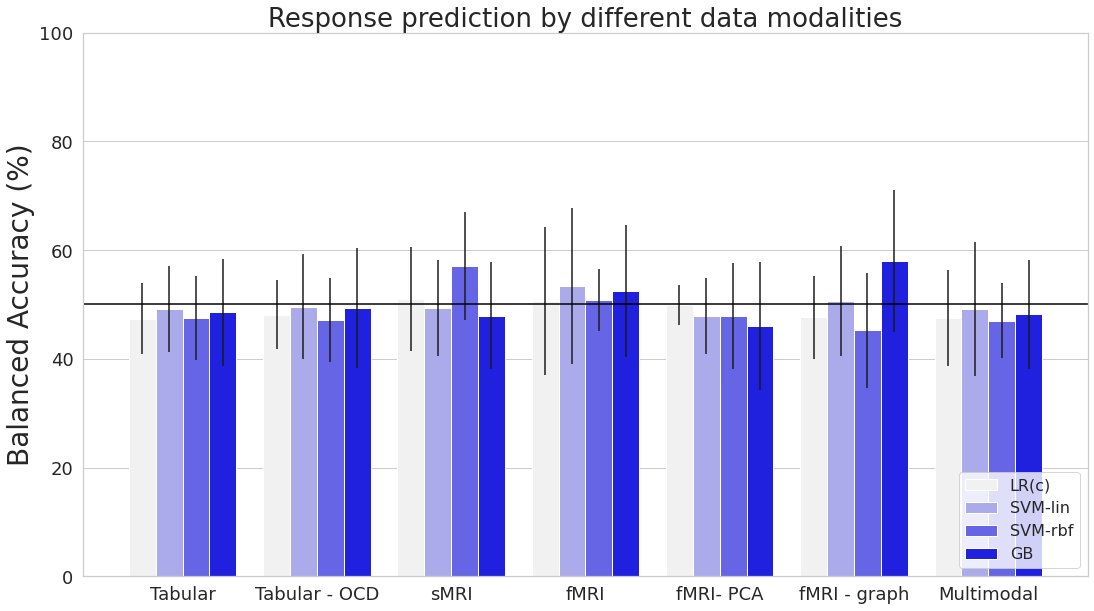


** (org.inkscape.Inkscape:607226): WARNING **: 09:43:20.268: Can't open file: /home/marijatochadse/Documents/presentations_Marija/poster_2024/EPOC_res.emf (doesn't exist)
ink_file_open: '/home/marijatochadse/Documents/presentations_Marija/poster_2024/EPOC_res.emf' cannot be opened!
InkscapeApplication::document_open: Failed to open: /home/marijatochadse/Documents/presentations_Marija/poster_2024/EPOC_res.emf
ConcreteInkscapeApplication::on_open: failed to create document!

** (org.inkscape.Inkscape:607226): WARNING **: 09:52:49.024: Can't open file: /home/marijatochadse/Documents/presentations_Marija/poster_2024/age_OCD.emf (doesn't exist)
ink_file_open: '/home/marijatochadse/Documents/presentations_Marija/poster_2024/age_OCD.emf' cannot be opened!
InkscapeApplication::document_open: Failed to open: /home/marijatochadse/Documents/presentations_Marija/poster_2024/age_OCD.emf
ConcreteInkscapeApplication::on_open: failed to create document!

** (org.inkscape.Inkscape:607226): WARNING **:

In [17]:
hue_order = ["LR(c)", "SVM-lin", "SVM-rbf", "GB"]

sns.set(font_scale=2)
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(18,10))
sns.barplot(x="features", y="val_metric_perc", hue = "model", order=feat_names, hue_order = hue_order, data=group_valmetric_mean, capsize=.1, color = 'blue') # set data=repetition_perf for sd bar
# Get the legend from just the box plot
handles, labels = ax.get_legend_handles_labels()

ax.set_ylim(0, 100)
ax.set_title('Response prediction by different data modalities', fontsize=26)
ax.set_ylabel('Balanced Accuracy (%)', fontsize=28)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlabel('', fontsize=18)

# Remove the old legend
ax.legend_.remove()
# Add just the handles/labels from the box plot back
ax.legend(
    handles,
    labels,
    loc=4,
    fontsize = 16,
)

x_coords = [p.get_x() + 0.5*p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
coords = pd.DataFrame({'x':x_coords, 'y':y_coords})
coords = coords.sort_values(by=['x'])
plt.errorbar(x=coords['x'], y=coords['y'], yerr=errvals_perc, fmt="none", c= "k")


plt.axhline(y = 50, color = 'black', label = 'axvline - full height')

plt.savefig('/home/marijatochadse/Documents/presentations_Marija/poster_2024/EPOC_res.svg', format='svg', bbox_inches='tight')

### Remission

In [47]:
tab_path = '/home/marijatochadse/2_scripts/MLpipeline_Marija/results/classification_Marija_CONFSSex/TAB_noclin_OUTRemission_CONFSSex/20240409-1437/run.csv'
tab_OCD_path = '/home/marijatochadse/2_scripts/MLpipeline_Marija/results/classification_Marija_CONFSSex/TAB_OUTRemission_CONFSSex/20240130-1045/run.csv'
sMRI_path = '/home/marijatochadse/2_scripts/MLpipeline_Marija/results/classification_Marija_MRI_Remission/MRI_OUTRemission_CONFSSex/20240202-1246/run.csv'
fMRI_path = '/home/marijatochadse/2_scripts/MLpipeline_Marija/results/classification_Marija_MRI_Remission/fMRI_OUTRemission_CONFSSex/20240202-1251/run.csv'
fMRI_PCA_path = '/home/marijatochadse/2_scripts/MLpipeline_Marija/results/classification_Marija_MRI_PCA_Remission/fMRI_OUTRemission_CONFSSex/20240515-1524/run.csv'
graph_path = '/home/marijatochadse/2_scripts/MLpipeline_Marija/results/classification_Marija_CONFSSex/graph_fMRI_OUTRemission_CONFSSex/20240411-1656/run.csv'
multi_path = '/home/marijatochadse/2_scripts/MLpipeline_Marija/results/classification_Marija_MRI_Remission/TABnoclin_sMRI_OUTRemission_CONFSSex/20240410-1124/run.csv'

paths = [tab_path, tab_OCD_path, sMRI_path, fMRI_path, fMRI_PCA_path, graph_path, multi_path]
feat_names = ["Tabular", "Tabular - OCD", "sMRI", "fMRI", "fMRI - PCA", "fMRI - graph", "Multimodal"]

In [48]:
df = pd.DataFrame()

for i, path in enumerate(paths):
    df_feat = set_features(path, feat_names[i])

    df = pd.concat([df, df_feat], ignore_index=True)

In [49]:
df.head()

,task_type,model,analysis,repetition,trial,inp,out,technique,confs,n_samples,...,val_metric,val_ids,train_ids,val_lbls,val_preds,permuted_test_score,permuted_roc_auc,other_metrics,runtime,features
0,classification,GB,classification_baseline_Remission_GB,7,0,Geschlecht,Remission,cb,['Geschlecht'],119,...,0.5,"[6, 11, 15, 17, 26, 27, 30, 44, 57, 59, 72, 80...","[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 13, 14, 16...","[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5...","[0.4652777777777778, 0.4652777777777778, 0.534...","[0.4652777777777778, 0.4652777777777778, 0.534...",{'roc_auc': 0.5},131,Tabular
1,classification,GB,classification_baseline_Remission_GB,9,0,Geschlecht,Remission,cb,['Geschlecht'],119,...,0.5,"[0, 6, 12, 20, 21, 35, 38, 43, 47, 56, 66, 69,...","[1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 1...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...","[[0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5...","[0.5, 0.7638888888888888, 0.7638888888888888, ...","[0.5, 0.7638888888888888, 0.7638888888888888, ...",{'roc_auc': 0.5},146,Tabular
2,classification,GB,classification_baseline_Remission_GB,8,0,Geschlecht,Remission,cb,['Geschlecht'],119,...,0.5,"[8, 10, 21, 22, 26, 31, 37, 48, 50, 55, 56, 70...","[0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[[0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5...","[0.5902777777777778, 0.4097222222222222, 0.409...","[0.5902777777777778, 0.4097222222222222, 0.409...",{'roc_auc': 0.5},141,Tabular
3,classification,GB,classification_baseline_Remission_GB,6,0,Geschlecht,Remission,cb,['Geschlecht'],119,...,0.5,"[1, 2, 10, 13, 26, 27, 28, 29, 30, 33, 60, 74,...","[0, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 1...","[0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...","[[0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5...","[0.5208333333333333, 0.47916666666666663, 0.47...","[0.5208333333333333, 0.47916666666666663, 0.47...",{'roc_auc': 0.5},142,Tabular
4,classification,GB,classification_baseline_Remission_GB,0,0,Geschlecht,Remission,cb,['Geschlecht'],119,...,0.5,"[3, 11, 14, 15, 20, 23, 30, 37, 40, 46, 66, 74...","[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 16, 17...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...","[[0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5...","[0.2361111111111111, 0.7638888888888888, 0.236...","[0.2361111111111111, 0.7638888888888888, 0.236...",{'roc_auc': 0.5},136,Tabular


In [50]:
df.shape

(5824, 25)

In [51]:
df = df[df["inp"]=="X"]
df = df[df["out"]=="Remission"]
df.shape

(1939, 25)

In [52]:
group_valmetric = df[["model", "val_metric", "features"]]
group_valmetric_mean = group_valmetric.groupby(["features", "model"])['val_metric'].mean().reset_index()
group_valmetric_mean['val_metric_perc'] = group_valmetric_mean['val_metric']*100
group_valmetric_mean

,features,model,val_metric,val_metric_perc
0,Multimodal,GB,0.621939,62.193878
1,Multimodal,LR(c),0.602312,60.231194
2,Multimodal,SVM-lin,0.636991,63.699103
3,Multimodal,SVM-rbf,0.601449,60.144928
4,Tabular,GB,0.589782,58.978175
5,Tabular,LR(c),0.615338,61.533816
6,Tabular,SVM-lin,0.621779,62.177939
7,Tabular,SVM-rbf,0.589271,58.927134
8,Tabular - OCD,GB,0.679067,67.906746
9,Tabular - OCD,LR(c),0.644424,64.442432


In [53]:
repetition_perf = df[['model', 'val_metric', 'repetition', 'features']].groupby(['features', 'model', 'repetition']).mean()
repetition_perf = repetition_perf.reset_index()
print(repetition_perf)

       features    model  repetition  val_metric
0    Multimodal       GB           0    0.647959
1    Multimodal       GB           1    0.612245
2    Multimodal       GB           2    0.523810
3    Multimodal       GB           3    0.675170
4    Multimodal       GB           4    0.574830
..          ...      ...         ...         ...
275        sMRI  SVM-rbf           5    0.539116
276        sMRI  SVM-rbf           6    0.518707
277        sMRI  SVM-rbf           7    0.508503
278        sMRI  SVM-rbf           8    0.511905
279        sMRI  SVM-rbf           9    0.552721

[280 rows x 4 columns]


In [54]:
trial_perf = df[['model', 'val_metric', 'repetition', 'trial', 'features']].groupby(['features', 'model', 'repetition', 'trial']).mean()
trial_perf = trial_perf.reset_index()
print(trial_perf)

        features    model  repetition  trial  val_metric
0     Multimodal       GB           0      0    0.464286
1     Multimodal       GB           0      1    0.535714
2     Multimodal       GB           0      2    0.714286
3     Multimodal       GB           0      3    0.678571
4     Multimodal       GB           0      4    0.773810
...          ...      ...         ...    ...         ...
1934        sMRI  SVM-rbf           9      2    0.607143
1935        sMRI  SVM-rbf           9      3    0.535714
1936        sMRI  SVM-rbf           9      4    0.666667
1937        sMRI  SVM-rbf           9      5    0.464286
1938        sMRI  SVM-rbf           9      6    0.333333

[1939 rows x 5 columns]


In [55]:
hue_order = ["LR(c)", "SVM-lin", "SVM-rbf", "GB"]

trial_sd = df[['model', 'val_metric', 'repetition', 'trial', 'features']].groupby(['features', 'model'])['val_metric'].std().reset_index()
trial_sd["features"] = pd.Categorical(trial_sd["features"], categories = feat_names)
trial_sd["model"] = pd.Categorical(trial_sd["model"], categories = hue_order)
trial_sd = trial_sd.sort_values(by = ["features", "model"], ignore_index=True)

#test_errvals = np.arange(0.01, 0.11, 0.0037)
errvals = trial_sd[['val_metric']]
errvals_perc = pd.DataFrame()
errvals_perc['val_metric_perc'] = errvals['val_metric'] *100

errvals = errvals['val_metric'].tolist()
errvals_perc = errvals_perc['val_metric_perc'].tolist()
print(errvals)

[0.11338072976441323, 0.11602920030822483, 0.12438161401755851, 0.11746692690223545, 0.11539792462089425, 0.11979332904206406, 0.11670568440726402, 0.10939887469882505, 0.13118559998122797, 0.1400551851150225, 0.1288444940479908, 0.13610820439494245, 0.15647323496192153, 0.15750050181023098, 0.14210165903474264, 0.1339109297482851, 0.12904073328172097, 0.13262992918265015, 0.12644307676739003, 0.14479485817763485, 0.14212707059623747, 0.12697711764643704, 0.10263703565200111, 0.13311857272874067, 0.12930783699799137, 0.11602649759551423, 0.1269047339141189, 0.14386628438095062]


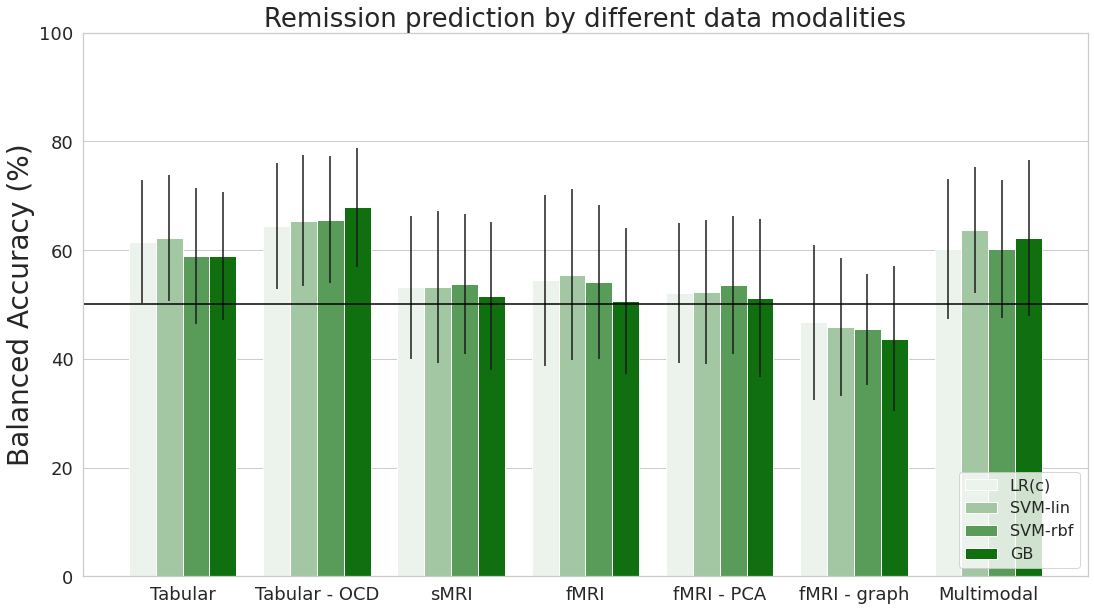

In [57]:
hue_order = ["LR(c)", "SVM-lin", "SVM-rbf", "GB"]

sns.set(font_scale=2)
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(18,10))
sns.barplot(x="features", y="val_metric_perc", hue = "model", order=feat_names, hue_order = hue_order, data=group_valmetric_mean, capsize=.1, color = 'green') # set data=repetition_perf for sd bar
# Get the legend from just the box plot
handles, labels = ax.get_legend_handles_labels()

ax.set_ylim(0, 100)
ax.set_title('Remission prediction by different data modalities', fontsize=26)
ax.set_ylabel('Balanced Accuracy (%)', fontsize=28)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlabel('', fontsize=18)

# Remove the old legend
ax.legend_.remove()
# Add just the handles/labels from the box plot back
ax.legend(
    handles,
    labels,
    loc=4,
    fontsize = 16,
)

x_coords = [p.get_x() + 0.5*p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
coords = pd.DataFrame({'x':x_coords, 'y':y_coords})
coords = coords.sort_values(by=['x'])
plt.errorbar(x=coords['x'], y=coords['y'], yerr=errvals_perc, fmt="none", c= "k")


plt.axhline(y = 50, color = 'black', label = 'axvline - full height')

plt.savefig('/home/marijatochadse/2_scripts/EPOC_MLresults/paper_figures/25_07_24/remission_bars_SD_percent.png', format='png', bbox_inches='tight')